# Logistic Regression


In [292]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

 # 1.1 Load the data 

In [293]:
df=pd.read_csv('C:\\Users\\Assem\\Desktop\\heart.csv')



In [294]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# 1.2 Data preprocessing

In [295]:
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [296]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [297]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [298]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [299]:
df.shape

(918, 12)

In [300]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [301]:
df["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [302]:
df["Cholesterol"].unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

In [303]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [304]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [305]:
df["Cholesterol"] .value_counts()

Cholesterol
0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: count, Length: 222, dtype: int64

In [306]:
df["Age"] .value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [307]:
df["HeartDisease"] .value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [308]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

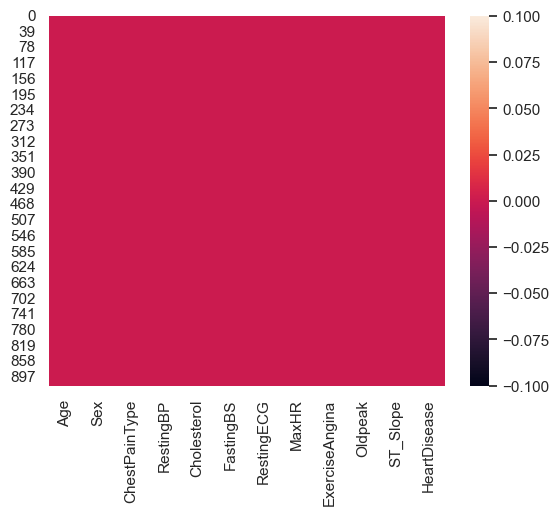

In [309]:
sns.heatmap(df.isnull())

C:\Users\Assem\AppData\Local\Temp\ipykernel_12404\2650088107.py:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df['Sex'].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',


<Axes: title={'center': 'Pie Chart for Heart Disease'}, ylabel='count'>

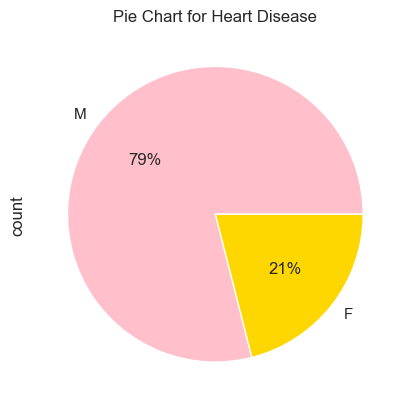

In [310]:
colors = ['#FFC0CB', '#FFD700']
df['Sex'].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',
                              autopct='%.0f%%', colormap='nipy_spectral_r', colors=colors)

C:\Users\Assem\AppData\Local\Temp\ipykernel_12404\973336645.py:3: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  df['ChestPainType'].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',


<Axes: title={'center': 'Pie Chart for Heart Disease'}, ylabel='count'>

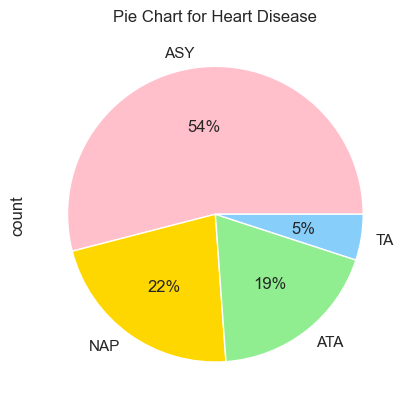

In [311]:
colors = ['#FFC0CB', '#FFD700', '#90EE90', '#87CEFA', '#FFA07A']  

df['ChestPainType'].value_counts().plot(kind='pie', title='Pie Chart for Heart Disease',
                              autopct='%.0f%%', colormap='nipy_spectral_r', colors=colors)

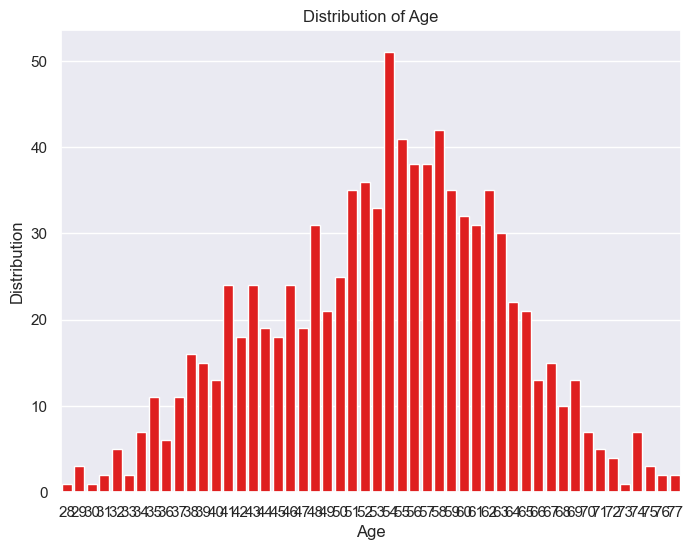

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Age', color='red')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of Age')
plt.show()


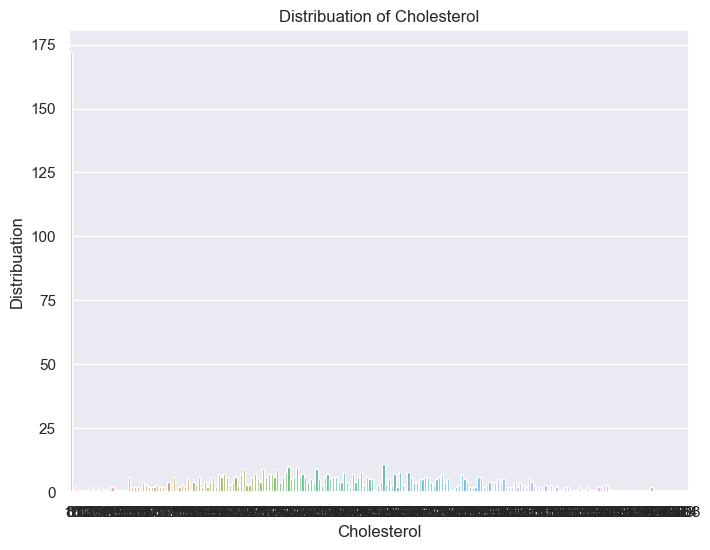

In [313]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Distribuation')
plt.title('Distribuation of Cholesterol')
plt.show()

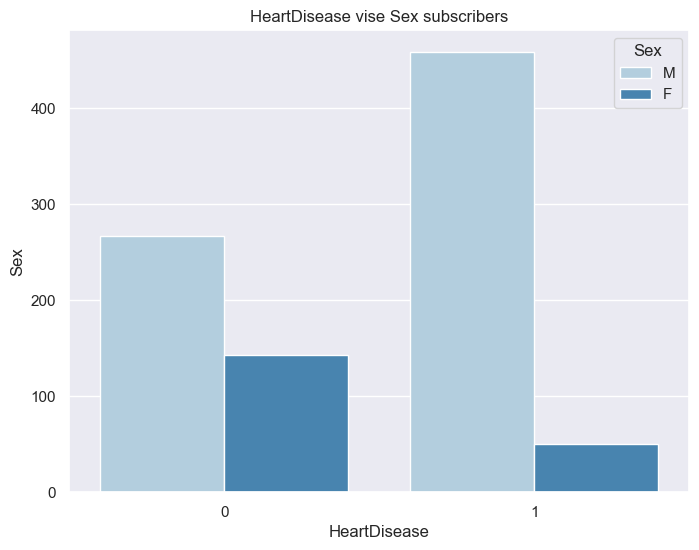

In [314]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='HeartDisease', hue='Sex', palette='Blues')
plt.xlabel('HeartDisease')
plt.ylabel('Sex')
plt.title('HeartDisease vise Sex subscribers')
plt.show()

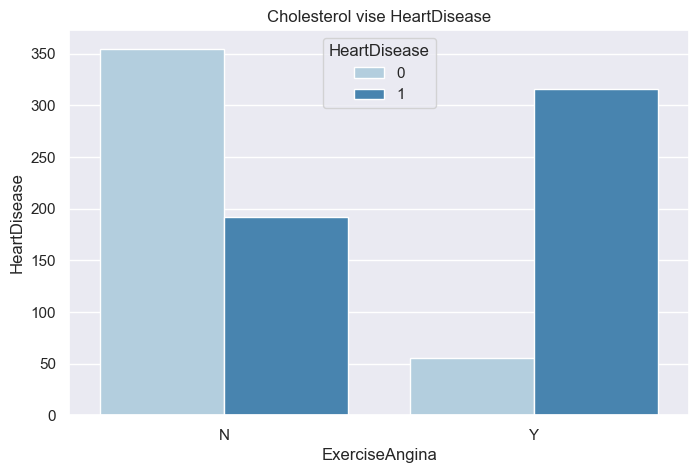

In [315]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='ExerciseAngina', hue='HeartDisease', palette='Blues')
plt.xlabel('ExerciseAngina')
plt.ylabel('HeartDisease')
plt.title('Cholesterol vise HeartDisease')
plt.show()

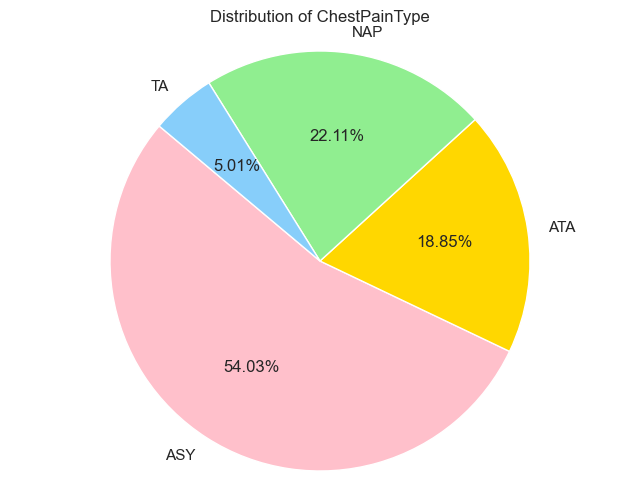

In [316]:
ChestPainType = df.groupby('ChestPainType').size()

colors = ['#FFC0CB', '#FFD700', '#90EE90', '#87CEFA'] 
plt.figure(figsize=(8, 6))
plt.pie(ChestPainType, labels=ChestPainType.index, autopct='%.2f%%', startangle=140, colors=colors)
plt.title('Distribution of ChestPainType')
plt.axis('equal')
plt.show()

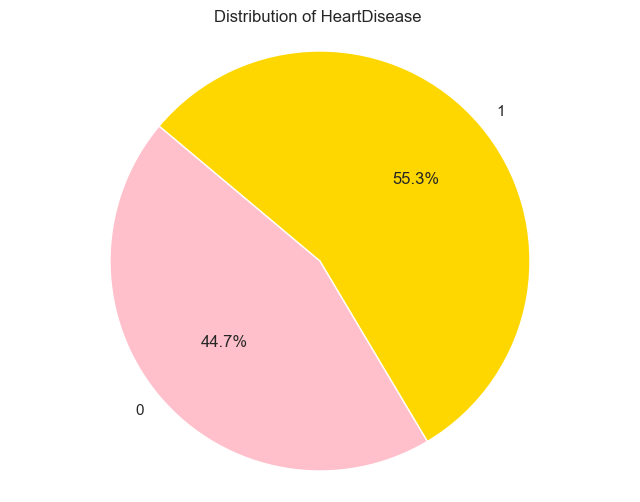

In [317]:
HeartDisease = df.groupby('HeartDisease').size()
plt.figure(figsize=(8,6))
colors = ['#FFC0CB', '#FFD700', '#90EE90', '#87CEFA'] 
plt.pie(HeartDisease,labels=HeartDisease.index,autopct='%1.1f%%' , startangle=140 , colors=colors)
plt.title('Distribution of HeartDisease ')
plt.axis('equal')
plt.show()

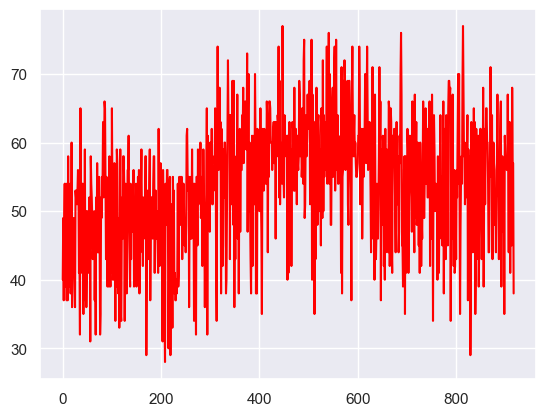

In [318]:
laste = df['Age'].plot(color='red')  
plt.show(laste)

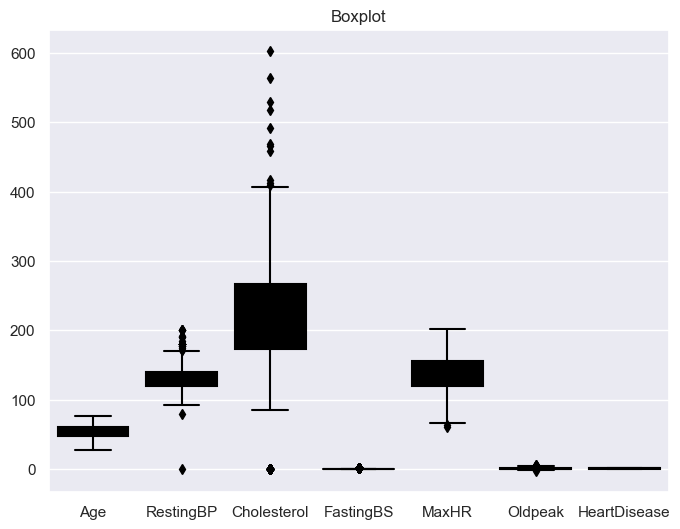

In [336]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, color='black')
plt.title('Boxplot')
plt.show()

# 1.3 visualize the data

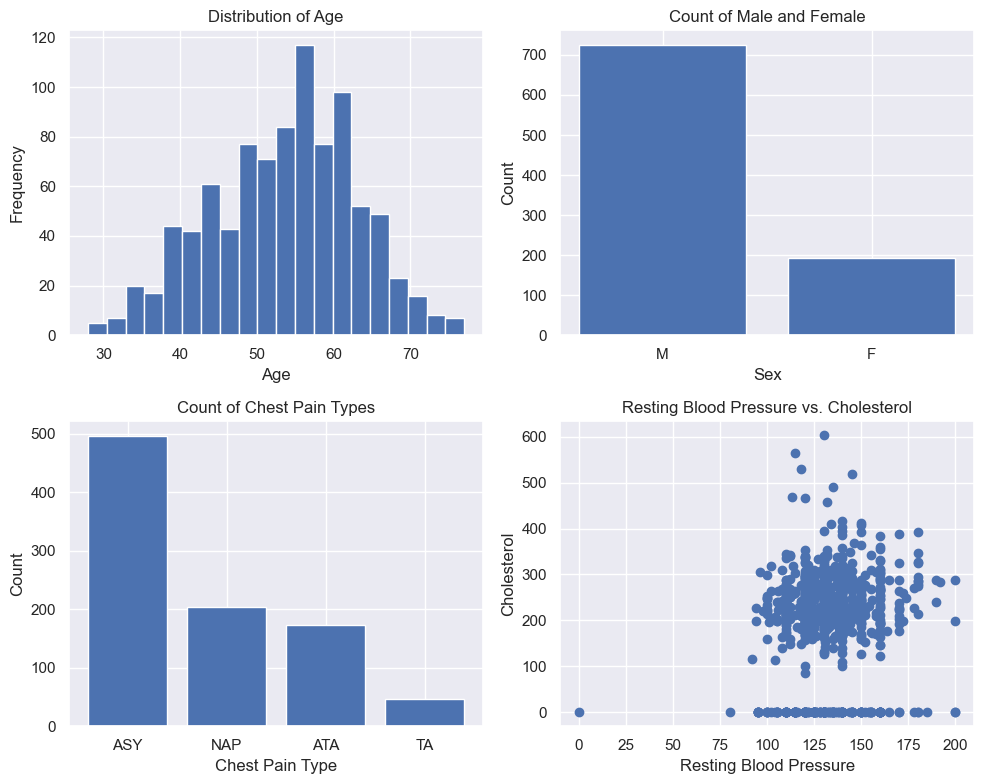

In [320]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0, 0].hist(X['Age'], bins=20)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Age')

sex_counts = X['Sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values)
axes[0, 1].set_xlabel('Sex')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Count of Male and Female')

chest_pain_counts = X['ChestPainType'].value_counts()
axes[1, 0].bar(chest_pain_counts.index, chest_pain_counts.values)
axes[1, 0].set_xlabel('Chest Pain Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Count of Chest Pain Types')
axes[1, 1].scatter(X['RestingBP'], X['Cholesterol'])
axes[1, 1].set_xlabel('Resting Blood Pressure')
axes[1, 1].set_ylabel('Cholesterol')
axes[1, 1].set_title('Resting Blood Pressure vs. Cholesterol')

plt.tight_layout()
plt.show()


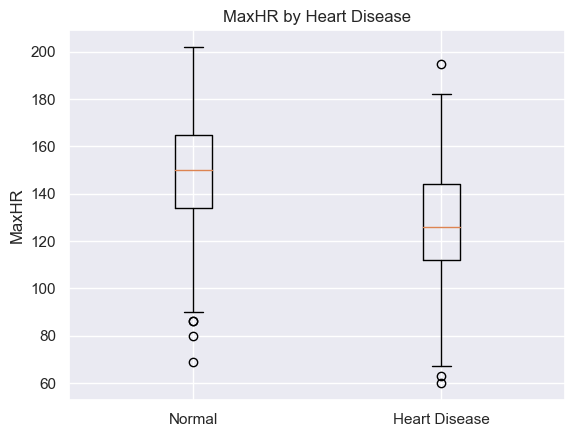

In [321]:
plt.boxplot([X[y == 0]['MaxHR'], X[y == 1]['MaxHR']])
plt.xticks([1, 2], ['Normal', 'Heart Disease'])
plt.ylabel('MaxHR')
plt.title('MaxHR by Heart Disease')
plt.show()

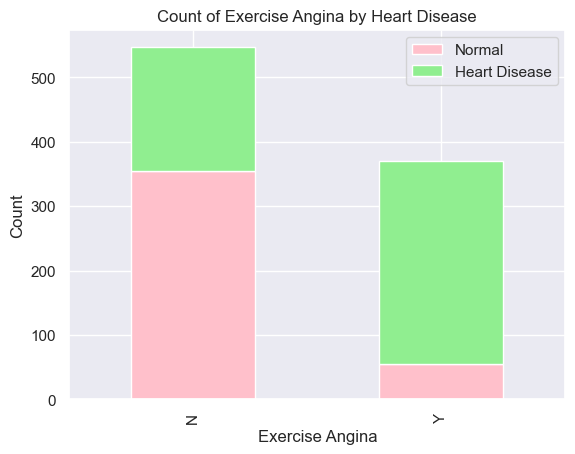

In [322]:
exercise_angina_counts = pd.concat([X['ExerciseAngina'], y.rename('HeartDisease')], axis=1)
exercise_angina_counts = exercise_angina_counts.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack()
colors = ['#FFC0CB', '#90EE90']  
exercise_angina_counts.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Exercise Angina')
plt.ylabel('Count')
plt.title('Count of Exercise Angina by Heart Disease')
plt.legend(['Normal', 'Heart Disease'])
plt.show()


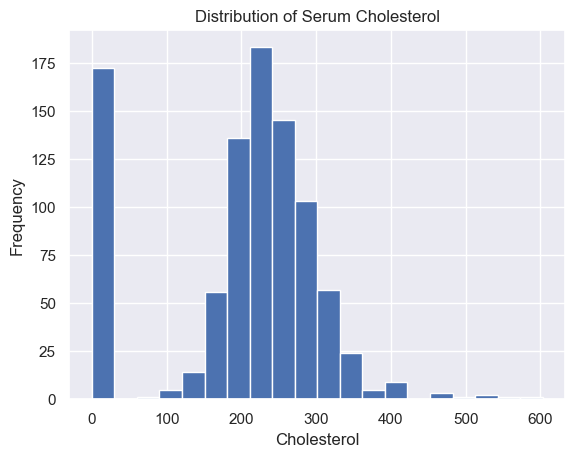

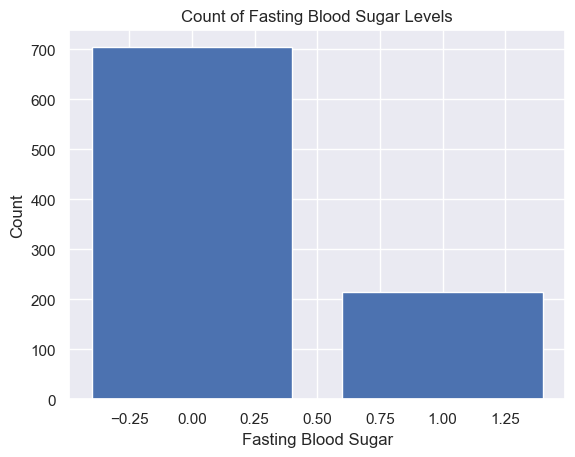

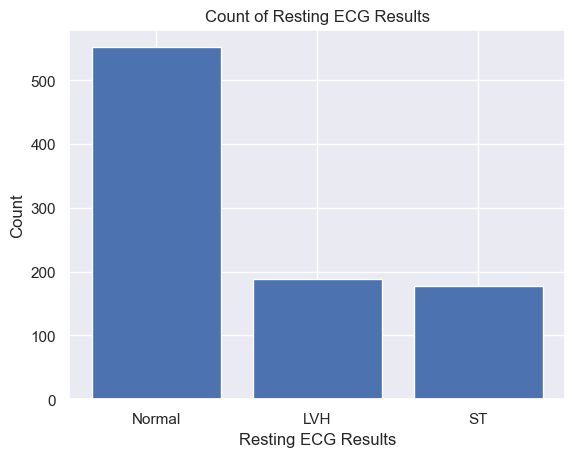

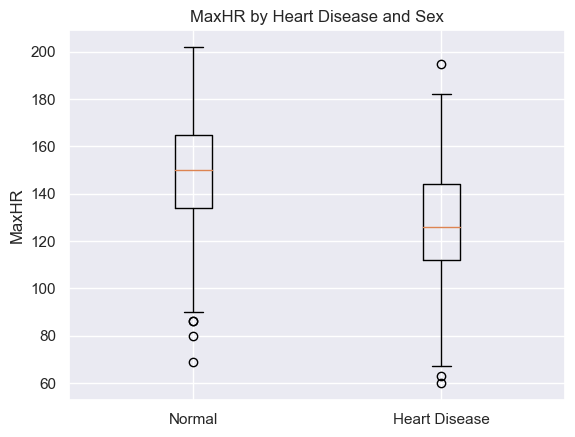

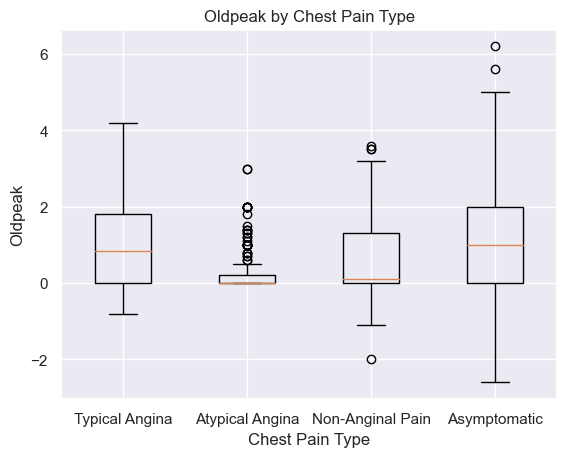

In [323]:
plt.hist(X['Cholesterol'], bins=20)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Distribution of Serum Cholesterol')
plt.show()

fbs_counts = X['FastingBS'].value_counts()
plt.bar(fbs_counts.index, fbs_counts.values)
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.title('Count of Fasting Blood Sugar Levels')
plt.show()
resting_ecg_counts = X['RestingECG'].value_counts()
plt.bar(resting_ecg_counts.index, resting_ecg_counts.values)
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.title('Count of Resting ECG Results')
plt.show()

plt.boxplot([X[y == 0]['MaxHR'], X[y == 1]['MaxHR']], labels=['Normal', 'Heart Disease'])
plt.ylabel('MaxHR')
plt.title('MaxHR by Heart Disease and Sex')
plt.show()

# Plotting the box plot of oldpeak by chest pain type
plt.boxplot([X[X['ChestPainType'] == 'TA']['Oldpeak'],
             X[X['ChestPainType'] == 'ATA']['Oldpeak'],
             X[X['ChestPainType'] == 'NAP']['Oldpeak'],
             X[X['ChestPainType'] == 'ASY']['Oldpeak']],
            labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Oldpeak')
plt.title('Oldpeak by Chest Pain Type')
plt.show()

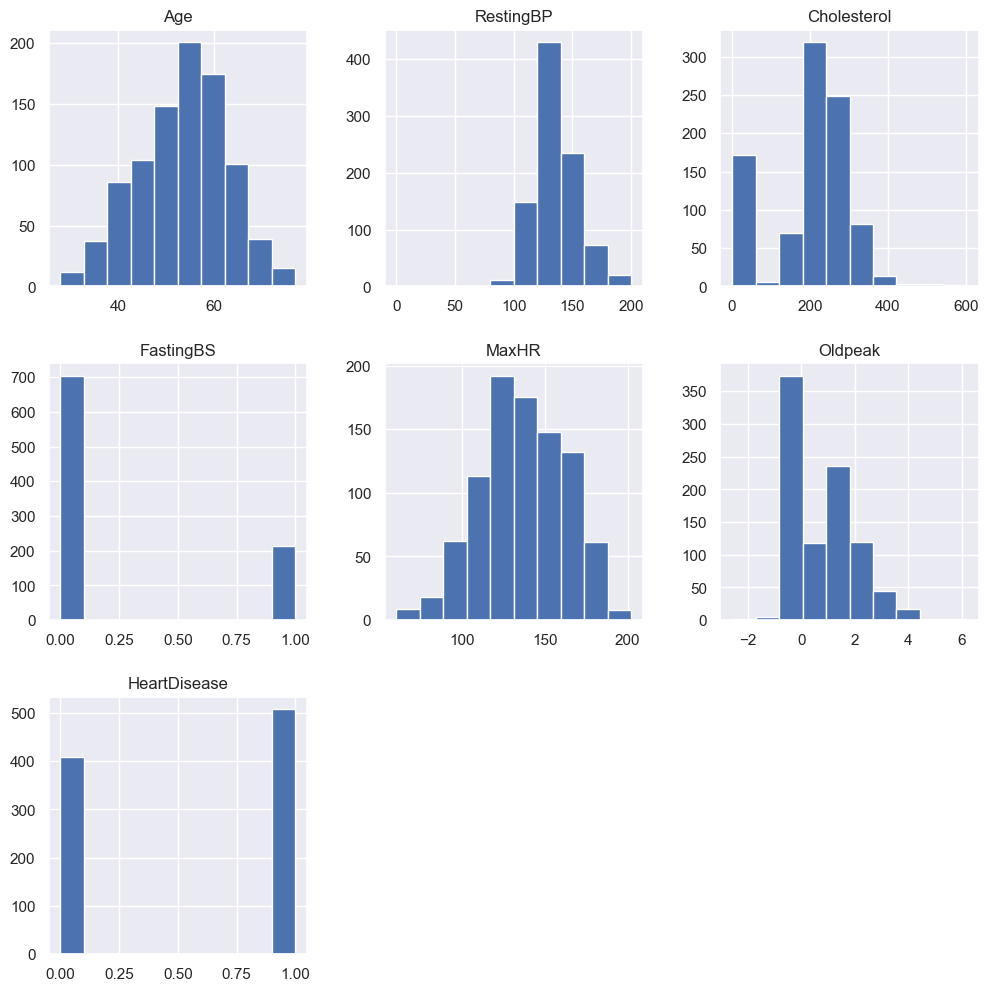

In [324]:
df.hist(figsize = (12, 12))
plt.show()

# 1.4 Split the data into training and test sets

In [325]:
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

In [326]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [328]:

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Assem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# 1.5 overfitting

In [329]:
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8773841961852861


In [330]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8478260869565217


In [331]:
accuracy_diff = train_accuracy - test_accuracy
print("Accuracy Difference:", accuracy_diff)

Accuracy Difference: 0.02955810922876434


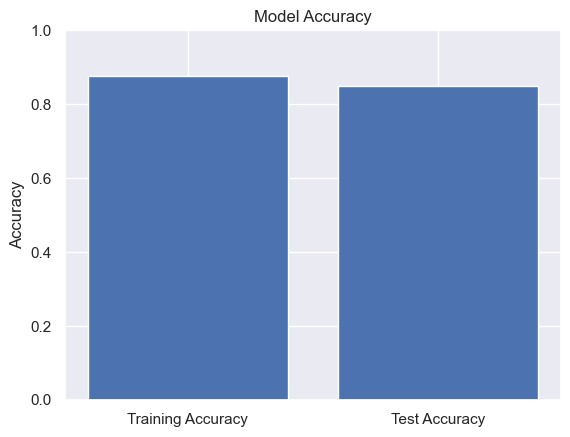

In [332]:
labels = ['Training Accuracy', 'Test Accuracy']
accuracy_scores = [train_accuracy, test_accuracy]

plt.bar(labels, accuracy_scores)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

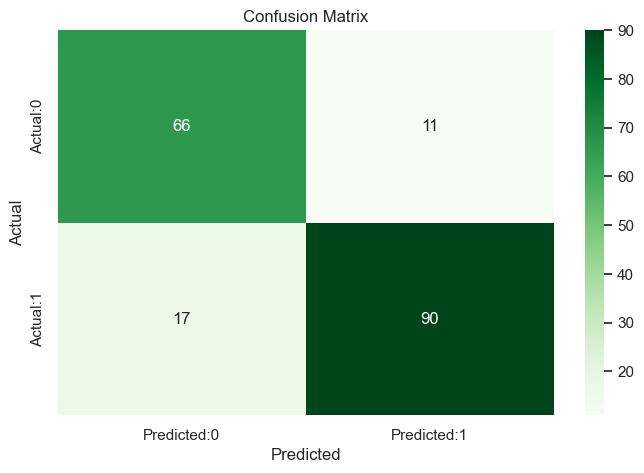

In [333]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

cm = confusion_matrix(y_test, test_predictions)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

plt.figure(figsize=(8, 5))
sn.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [334]:
train_predictions = model.predict(X_train)
train_report = classification_report(y_train, train_predictions)
print("Training Performance:")
print(train_report)

Training Performance:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       333
           1       0.88      0.90      0.89       401

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.88       734
weighted avg       0.88      0.88      0.88       734



In [138]:
test_predictions = model.predict(X_test)
test_report = classification_report(y_test, test_predictions)
print("Test Performance:")
print(test_report)

Test Performance:
              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [139]:
score_lr = round(accuracy_score(test_predictions,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.78 %
